In [107]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your modules!")

Autoreload of imported modules enabled. Be sure to save your modules!


Calling the csv file with the data into the Jupyter Notebook to work with.

In [108]:
DATA_DIRECTORY="data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/Annual_Greenhouse_Gas_(GHG)_Air_Emissions_Accounts.csv"

Converting the data in the CSV file into a row based table to work with.

In [109]:
from helper_functions import read_csv_rows
data_rows: list[dict[str,str]] = read_csv_rows(DATA_FILE_PATH)

print(f"Data File Read: {DATA_FILE_PATH}")
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Column names: {data_rows[0].keys()}")

Data File Read: data/Annual_Greenhouse_Gas_(GHG)_Air_Emissions_Accounts.csv
1053 rows
25 columns
Column names: dict_keys(['\ufeffObjectId2', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Industry', 'Gas_Type', 'Scale', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021'])


In [110]:
from helper_functions import column_values

#country: list[str] = column_values(data_rows, "Country")

#print(f"Column 'Country' has {len(country)} values.")
#print("The first twenty values are:")
#for i in range(20):
    #print(country[i])

Cutting down the table into rows with data from advanced economies.

In [111]:
from helper_functions import filter_table

advanced_economies: list[dict[str,str]] = filter_table(data_rows, "Country", "Advanced Economies")

Separating the data from advanced economies into data about the different gases. Also filtering the data to just include rows with gas emissions from "Total Industry and Households", since that is all of the other industry emissions for the different gases added together. 

(We didn't filter the greenhouse gas emissions like this, as we used the total greenhouse gas emissions to see the breakdown of total emissions per industry in 2021.)

In [112]:
advanced_economies_carbon_dioxide: list[dict[str,str]] = filter_table(filter_table(advanced_economies, "Gas_Type", "Carbon dioxide"), "Industry", "Total Industry and Households")
advanced_economies_greenhouse: list[dict[str,str]] = filter_table(advanced_economies, "Gas_Type", "Greenhouse gas")
advanced_economies_methane: list[dict[str,str]] = filter_table(filter_table(advanced_economies, "Gas_Type", "Methane"), "Industry", "Total Industry and Households")
advanced_economies_nitrous_oxide: list[dict[str,str]] = filter_table(filter_table(advanced_economies, "Gas_Type", "Nitrous oxide"), "Industry", "Total Industry and Households")
advanced_economies_fluorinated_gases: list[dict[str,str]] = filter_table(filter_table(advanced_economies, "Gas_Type", "Fluorinated gases"), "Industry", "Total Industry and Households")

Using the columnar function to check and see if the data was filtered properly.

In [113]:
from helper_functions import columnar

#advanced_data_cols: dict[str, list[str]] = columnar(advanced_economies)

#print(f"{len(advanced_data_cols.keys())} columns")
#print(f"{len(advanced_data_cols['Country'])} rows")
#print(f"Columns names: {advanced_data_cols.keys()}")
advanced_carbon_dioxide_cols: dict[str, list[str]] = columnar(advanced_economies_carbon_dioxide)
from tabulate import tabulate
#tabulate(advanced_data_cols, advanced_data_cols.keys(), "html")
tabulate(advanced_carbon_dioxide_cols, advanced_carbon_dioxide_cols.keys(), "html")

﻿ObjectId2,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Industry,Gas_Type,Scale,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
32,Advanced Economies,,AETMP,Annual greenhouse gas (GHG) air emissions accounts,Million metric tons of CO2 equivalent,"Organisation for Economic Co-operation and Development (2022), Air Emission Accounts, OECD.Stat https://stats.oecd.org/Index.aspx?DataSetCode=AEA. Accessed on 2022-08-23; Organisation for Economic Co-operation and Development (2022), Air Emission Accounts – OECD Estimates, OECD.Stat https://stats.oecd.org/Index.aspx?DataSetCode=OECD-AEA. Accessed on 2022-08-23; United Nations Framework Convention on Climate Change (UNFCCC). 2022. Greenhouse Gas Inventory Data - Detailed data by Party - Annex I. https://di.unfccc.int/detailed_data_by_party. Accessed on 2022-08-23. Copyright 2022 United Nations Framework Convention on Climate Change; Crippa, M., Guizzardi, D., Solazzo, E., Muntean, M., Schaaf, E., Monforti-Ferrario, F., Banja, M., Olivier, J., Grassi, G., Rossi, S. and Vignati, E., GHG emissions of all world countries, EUR 30831 EN, Publications Office of the European Union, Luxembourg, 2021, ISBN 978-92-76-41547-3, doi:10.2760/074804, JRC126363.; World Resources Institute (WRI). Climate Analysis Indicators Tool (CAIT): WRI’s Climate Data Explorer. Washington, DC. License: CC BY-NC 4.0 https://cait.wri.org/historical/Country%20GHG%20Emissions. Accessed on 2022-08-23; IMF staff calculations.",ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions Accounts,"Environment, Climate Change, Economic Activity, Greenhouse Gas Emissions, Air Emissions Accounts",Total Industry and Households,Carbon dioxide,Units,12715.9,12529.7,12323.2,12397.9,12215.5,12099.2,11946.5,11929.2,12006.3,11702.4,10718.4,11245.8


Filtering the original data the same way we did for advanced economies (by gas type and for total industry only), but for emerging and developing economies instead.

In [114]:
emerging_economies: list[dict[str, str]] = filter_table(data_rows, "Country", "Emerging and Developing Economies")
#emerging_data_cols: dict[str, list[str]] = columnar(emerging_economies)

#print(f"{len(emerging_data_cols.keys())} columns")
#print(f"{len(emerging_data_cols['Country'])} rows")
#print(f"Columns names: {emerging_data_cols.keys()}")

#from tabulate import tabulate
#tabulate(emerging_data_cols, emerging_data_cols.keys(), "html")

In [115]:
emerging_economies_carbon_dioxide: list[dict[str,str]] = filter_table(filter_table(emerging_economies, "Gas_Type", "Carbon dioxide"), "Industry", "Total Industry and Households")
emerging_economies_greenhouse: list[dict[str,str]] = filter_table(emerging_economies, "Gas_Type", "Greenhouse gas")
emerging_economies_methane: list[dict[str,str]] = filter_table(filter_table(emerging_economies, "Gas_Type", "Methane"), "Industry", "Total Industry and Households")
emerging_economies_nitrous_oxide: list[dict[str,str]] = filter_table(filter_table(emerging_economies, "Gas_Type", "Nitrous oxide"), "Industry", "Total Industry and Households")
emerging_economies_fluorinated_gases: list[dict[str,str]] = filter_table(filter_table(emerging_economies, "Gas_Type", "Fluorinated gases"), "Industry", "Total Industry and Households")

Getting the total values of emissions per year for each gas (for advanced countries).

In [116]:
from helper_functions import add_column_values
year: int = 2010
advanced_vals_per_gas_per_year: dict[str, list[str]] = {}

advanced_vals_per_gas_per_year["Year"] = ["F2010", "F2011", "F2012", "F2013", "F2014", "F2015", "F2016", "F2017", "F2018", "F2019", "F2020", "F2021"]

vals_per_year: list[str] = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(advanced_economies_carbon_dioxide, f"F{year}")))
    year += 1
advanced_vals_per_gas_per_year["Carbon dioxide"] = vals_per_year

year = 2010
vals_per_year = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(advanced_economies_greenhouse, f"F{year}")))
    year += 1
advanced_vals_per_gas_per_year["Greenhouse gas"] = vals_per_year

year = 2010
vals_per_year = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(advanced_economies_methane, f"F{year}")))
    year += 1
advanced_vals_per_gas_per_year["Methane"] = vals_per_year

year = 2010
vals_per_year = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(advanced_economies_nitrous_oxide, f"F{year}")))
    year += 1
advanced_vals_per_gas_per_year["Nitrous oxide"] = vals_per_year

year = 2010
vals_per_year = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(advanced_economies_fluorinated_gases, f"F{year}")))
    year += 1
advanced_vals_per_gas_per_year["Fluorinated gases"] = vals_per_year

tabulate(advanced_vals_per_gas_per_year, advanced_vals_per_gas_per_year.keys(), "html")

Year,Carbon dioxide,Greenhouse gas,Methane,Nitrous oxide,Fluorinated gases
F2010,12715.9,29867.4,1417.86,764.182,35.779
F2011,12529.7,29401.8,1383.57,749.513,38.0714
F2012,12323.2,28909.2,1372.72,722.187,36.5465
F2013,12397.9,29138.3,1362.71,769.287,39.2466
F2014,12215.5,28781.1,1351.82,782.126,41.1007
F2015,12099.2,28531.6,1347.1,776.222,43.2348
F2016,11946.5,28154.2,1328.91,758.034,43.7091
F2017,11929.2,28135.4,1336.24,758.057,44.2368
F2018,12006.3,28322.1,1340.52,765.798,48.4153
F2019,11702.4,27690.2,1332.06,760.774,49.9016


Getting the total values of emissions per year for each gas (for emerging and developing countries).

In [117]:
from helper_functions import add_column_values
year: int = 2010
emerging_vals_per_gas_per_year: dict[str, list[str]] = {}
#vals_per_year: dict[int, float] = {}
#while year < 2022:
    #vals_per_year[year] = add_column_values(column_values(emerging_economies_carbon_dioxide, f"F{year}"))
    #year += 1
#vals_per_gas_per_year["Carbon dioxide"] = vals_per_year
#print(vals_per_gas_per_year)
emerging_vals_per_gas_per_year["Year"] = ["F2010", "F2011", "F2012", "F2013", "F2014", "F2015", "F2016", "F2017", "F2018", "F2019", "F2020", "F2021"]

vals_per_year: list[str] = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(emerging_economies_carbon_dioxide, f"F{year}")))
    year += 1
emerging_vals_per_gas_per_year["Carbon dioxide"] = vals_per_year

year = 2010
vals_per_year = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(emerging_economies_greenhouse, f"F{year}")))
    year += 1
emerging_vals_per_gas_per_year["Greenhouse gas"] = vals_per_year

year = 2010
vals_per_year = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(emerging_economies_methane, f"F{year}")))
    year += 1
emerging_vals_per_gas_per_year["Methane"] = vals_per_year

year = 2010
vals_per_year = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(emerging_economies_nitrous_oxide, f"F{year}")))
    year += 1
emerging_vals_per_gas_per_year["Nitrous oxide"] = vals_per_year

year = 2010
vals_per_year = []
while year < 2022:
    vals_per_year.append(add_column_values(column_values(emerging_economies_fluorinated_gases, f"F{year}")))
    year += 1
emerging_vals_per_gas_per_year["Fluorinated gases"] = vals_per_year

tabulate(emerging_vals_per_gas_per_year, emerging_vals_per_gas_per_year.keys(), "html")





Year,Carbon dioxide,Greenhouse gas,Methane,Nitrous oxide,Fluorinated gases
F2010,20906.2,60577.3,6993.14,1936.59,452.723
F2011,22131.1,63580.2,7165.23,1997.74,495.977
F2012,22957.4,65582.4,7279.08,2012.74,541.941
F2013,23321.3,66548.5,7317.42,2054.22,581.339
F2014,23760.3,67681.7,7381.82,2053.87,644.865
F2015,23771.8,67740.5,7411.82,2076.8,609.85
F2016,23949.1,68373.8,7481.9,2099.72,656.191
F2017,24503.6,69785.3,7570.36,2113.1,705.588
F2018,25205.1,71474.2,7644.97,2127.52,759.477
F2019,25634.1,72836.7,7842.83,2169.12,772.3


Plotting the Total Values of Gas Emissions Per Year for Advanced Economies in a Line Graph (Later decided to switch to bar graph because we felt it was a better representation of the data)

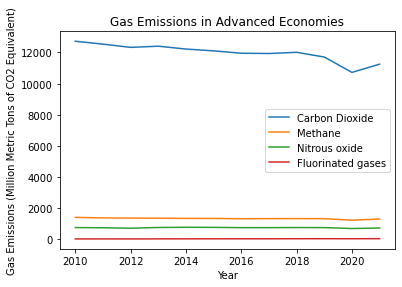

In [118]:
import matplotlib.pyplot as plt

int_advanced_vals_per_gas_per_year: list[float] = []
for val in advanced_vals_per_gas_per_year["Carbon dioxide"]:
    int_advanced_vals_per_gas_per_year.append(float(val))
#print(int_advanced_vals_per_gas_per_year)
list_of_years: list[int] = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

x = list_of_years
y1 = int_advanced_vals_per_gas_per_year
#print(type(x1[0]), type(y1[0]))
plt.plot(x, y1, label='Carbon Dioxide')

int_advanced_vals_per_gas_per_year = []
for val in advanced_vals_per_gas_per_year["Methane"]:
    int_advanced_vals_per_gas_per_year.append(float(val))

y2 = int_advanced_vals_per_gas_per_year
plt.plot(x, y2, label='Methane')

int_advanced_vals_per_gas_per_year = []
for val in advanced_vals_per_gas_per_year["Nitrous oxide"]:
    int_advanced_vals_per_gas_per_year.append(float(val))

y3 = int_advanced_vals_per_gas_per_year
plt.plot(x, y3, label='Nitrous oxide')

int_advanced_vals_per_gas_per_year = []
for val in advanced_vals_per_gas_per_year["Fluorinated gases"]:
    int_advanced_vals_per_gas_per_year.append(float(val))

y4 = int_advanced_vals_per_gas_per_year
plt.plot(x, y4, label='Fluorinated gases')

# plt.xlim([2009,2022])
# plt.ylim([0,30000])
plt.xlabel("Year")
plt.ylabel("Gas Emissions (Million Metric Tons of CO2 Equivalent)")
plt.title("Gas Emissions in Advanced Economies")
plt.legend()
plt.show()

Plotting the total values of Gas Emissions Per Year in Advanced Economies (broken down by type of Greenhouse Gas) on a bar graph.

[ 0  1  2  3  4  5  6  7  8  9 10 11]


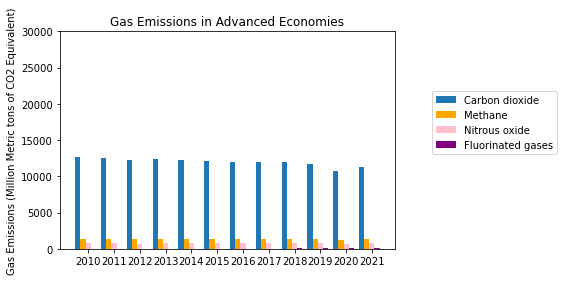

In [128]:
import numpy as np
#left = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

#int_advanced_vals_per_gas_per_year: list[float] = []
#for val in advanced_vals_per_gas_per_year["Carbon dioxide"]:
    #int_advanced_vals_per_gas_per_year.append(float(val))
#print(int_advanced_vals_per_gas_per_year)

#height = int_advanced_vals_per_gas_per_year
#tick_label = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
#plt.bar(left, height, tick_label=tick_label, width=1.4, color=['blue'])
#plt.xlabel('Year')
#plt.ylabel('Gas Emissions (Million Metric tons of CO2 Equivalent)')
#plt.title('Gas Emissions in Advanced Economies per year (2010-2021)')
#plt.show()

labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
advanced_carbon_dioxide_values_per_year: list[float] = []
for val in advanced_vals_per_gas_per_year["Carbon dioxide"]:
    advanced_carbon_dioxide_values_per_year.append(float(val))

advanced_methane_values_per_year: list[float] = []
for val in advanced_vals_per_gas_per_year["Methane"]:
    advanced_methane_values_per_year.append(float(val))

advanced_nitrous_oxide_values_per_year: list[float] = []
for val in advanced_vals_per_gas_per_year["Nitrous oxide"]:
    advanced_nitrous_oxide_values_per_year.append(float(val))

advanced_fluorinated_gases_values_per_year: list[float] = []
for val in advanced_vals_per_gas_per_year["Fluorinated gases"]:
    advanced_fluorinated_gases_values_per_year.append(float(val))

x = np.arange(len(labels))
print(x)
width = .2

fig, ax = plt.subplots()
carbon_dioxide_bar = ax.bar(x - (2 * width), advanced_carbon_dioxide_values_per_year, width, label="Carbon dioxide")
methane_bar = ax.bar(x - width, advanced_methane_values_per_year, width, label="Methane", color=['orange'])
nitrous_oxide_bar = ax.bar(x, advanced_nitrous_oxide_values_per_year, width, label="Nitrous oxide", color=['pink'])
fluorinated_gases_bar = ax.bar(x + width, advanced_fluorinated_gases_values_per_year, width, label="Fluorinated gases", color=['purple'])

ax.set_ylabel('Gas Emissions (Million Metric tons of CO2 Equivalent)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.5,.75))
ax.set_title('Gas Emissions in Advanced Economies')
ax.set_ylim(0, 30000)

plt.show()

Plotting the total values of Gas Emissions Per Year in Emerging and Developing Economies (broken down by type of Greenhouse Gas) on a bar graph.

[ 0  1  2  3  4  5  6  7  8  9 10 11]


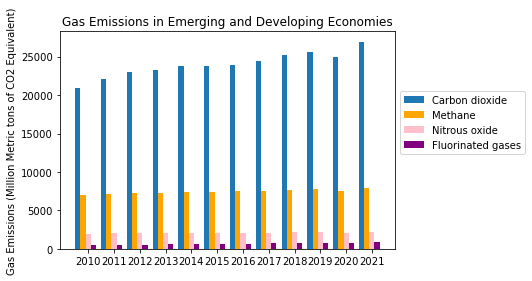

In [120]:
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
emerging_carbon_dioxide_values_per_year: list[float] = []
for val in emerging_vals_per_gas_per_year["Carbon dioxide"]:
    emerging_carbon_dioxide_values_per_year.append(float(val))

emerging_methane_values_per_year: list[float] = []
for val in emerging_vals_per_gas_per_year["Methane"]:
    emerging_methane_values_per_year.append(float(val))

emerging_nitrous_oxide_values_per_year: list[float] = []
for val in emerging_vals_per_gas_per_year["Nitrous oxide"]:
    emerging_nitrous_oxide_values_per_year.append(float(val))

emerging_fluorinated_gases_values_per_year: list[float] = []
for val in emerging_vals_per_gas_per_year["Fluorinated gases"]:
    emerging_fluorinated_gases_values_per_year.append(float(val))

x = np.arange(len(labels))
print(x)
width = .2

fig, ax = plt.subplots()
carbon_dioxide_bar = ax.bar(x - (2 * width), emerging_carbon_dioxide_values_per_year, width, label="Carbon dioxide")
methane_bar = ax.bar(x - width, emerging_methane_values_per_year, width, label="Methane", color=['orange'])
nitrous_oxide_bar = ax.bar(x, emerging_nitrous_oxide_values_per_year, width, label="Nitrous oxide", color=['pink'])
fluorinated_gases_bar = ax.bar(x + width, emerging_fluorinated_gases_values_per_year, width, label="Fluorinated gases", color=['purple'])

ax.set_ylabel('Gas Emissions (Million Metric tons of CO2 Equivalent)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.0,.75))
ax.set_title('Gas Emissions in Emerging and Developing Economies')

plt.show()

Filtering the previously filtered data about greenhouse gas emissions into subsets for each industry (for both advanced economies and emerging and developing economies).

(Total Industry and Households is not included because it is the sum of all of the other industries.)

In [121]:
advanced_economies_greenhouse_agriculture: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Agriculture, Forestry and Fishing"))
advanced_economies_greenhouse_construction: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Construction"))
advanced_economies_greenhouse_electricity: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Electricity, Gas, Steam and Air Conditioning Supply"))
advanced_economies_greenhouse_manufacturing: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Manufacturing"))
advanced_economies_greenhouse_mining: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Mining"))
advanced_economies_greenhouse_other: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Other Services Industries"))
advanced_economies_greenhouse_households: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Total Households"))
#advanced_economies_greenhouse_industry_and_households: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Total Industry and Households"))
advanced_economies_greenhouse_transportation: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Transportation and Storage"))
advanced_economies_greenhouse_water_supply: dict[str, list[str]] = columnar(filter_table(advanced_economies_greenhouse, "Industry", "Water supply; sewerage, waste management and remediation activities"))

emerging_economies_greenhouse_agriculture: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Agriculture, Forestry and Fishing"))
emerging_economies_greenhouse_construction: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Construction"))
emerging_economies_greenhouse_electricity: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Electricity, Gas, Steam and Air Conditioning Supply"))
emerging_economies_greenhouse_manufacturing: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Manufacturing"))
emerging_economies_greenhouse_mining: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Mining"))
emerging_economies_greenhouse_other: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Other Services Industries"))
emerging_economies_greenhouse_households: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Total Households"))
#emerging_economies_greenhouse_industry_and_households: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Total Industry and Households"))
emerging_economies_greenhouse_transportation: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Transportation and Storage"))
emerging_economies_greenhouse_water_supply: dict[str, list[str]] = columnar(filter_table(emerging_economies_greenhouse, "Industry", "Water supply; sewerage, waste management and remediation activities"))

#tabulate(emerging_economies_greenhouse_industry_and_households, emerging_economies_greenhouse_industry_and_households.keys(), "html")

Setting up the lists with the data for the pie charts (for both advanced economies and emerging and developing economies.)

In [122]:
list_of_industries: list[str] = [
    "Agriculture, Forestry and Fishing",
    "Construction",
    "Electricity, Gas, Steam and Air Conditioning Supply",
    "Manufacturing",
    "Mining",
    "Other Services Industries",
    "Total Households",
    "Transportation and Storage",
    "Water supply; sewerage, waste management and remediation activities"
]

advanced_greenhouse_emissions_per_industry_in_2021: list[float] = [
    float(advanced_economies_greenhouse_agriculture["F2021"][0]),
    float(advanced_economies_greenhouse_construction["F2021"][0]),
    float(advanced_economies_greenhouse_electricity["F2021"][0]),
    float(advanced_economies_greenhouse_manufacturing["F2021"][0]),
    float(advanced_economies_greenhouse_mining["F2021"][0]),
    float(advanced_economies_greenhouse_other["F2021"][0]),
    float(advanced_economies_greenhouse_households["F2021"][0]),
    float(advanced_economies_greenhouse_transportation["F2021"][0]),
    float(advanced_economies_greenhouse_water_supply["F2021"][0])
]

emerging_greenhouse_emissions_per_industry_in_2021: list[float] = [
    float(emerging_economies_greenhouse_agriculture["F2021"][0]),
    float(emerging_economies_greenhouse_construction["F2021"][0]),
    float(emerging_economies_greenhouse_electricity["F2021"][0]),
    float(emerging_economies_greenhouse_manufacturing["F2021"][0]),
    float(emerging_economies_greenhouse_mining["F2021"][0]),
    float(emerging_economies_greenhouse_other["F2021"][0]),
    float(emerging_economies_greenhouse_households["F2021"][0]),
    float(emerging_economies_greenhouse_transportation["F2021"][0]),
    float(emerging_economies_greenhouse_water_supply["F2021"][0])
]

Displaying the total greenhouse gas emissions in 2021, by industry, for advanced economies on a pie chart.

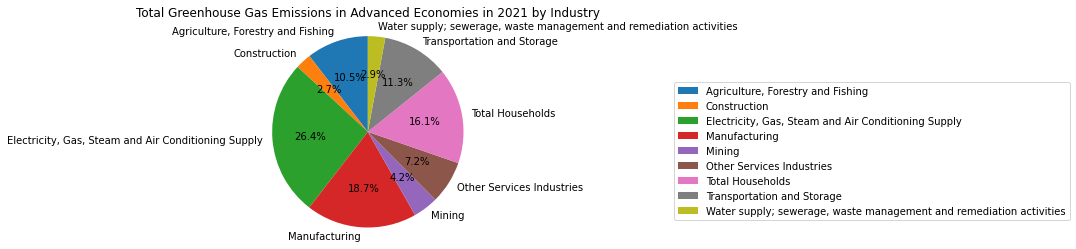

In [126]:
plt.pie(advanced_greenhouse_emissions_per_industry_in_2021, labels=list_of_industries, autopct='%1.1f%%', startangle=90, radius=1.1)
plt.title("Total Greenhouse Gas Emissions in Advanced Economies in 2021 by Industry")
plt.legend(bbox_to_anchor=(3.75,.75))
plt.show()

Displaying the total greenhouse gas emissions in 2021, by industry, for emerging and developing economies on a pie chart.

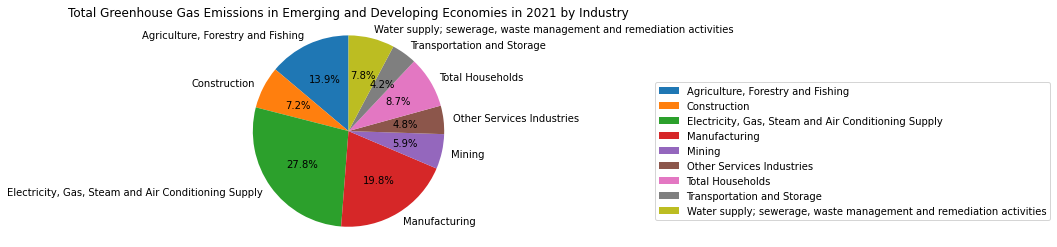

In [125]:
plt.pie(emerging_greenhouse_emissions_per_industry_in_2021, labels=list_of_industries, autopct='%1.1f%%', startangle=90, radius=1.1)
plt.title("Total Greenhouse Gas Emissions in Emerging and Developing Economies in 2021 by Industry")
plt.legend(bbox_to_anchor=(3.75,.75))
plt.show()